### Statistical Analysis & Understanding Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import specific functions from utils
from utils import (
    handle_categorical_missing_values,
    handle_numerical_missing_values,
    display_missing_info,
    encode_features,
    scale_features,
    look_for_outliers,
    handle_outliers_iqr,
    treat_skewness,
    apply_pca,
)
from sklearn.model_selection import train_test_split
from models.randomforest import random_forest_with_tuning
# from google.colab import drive

In [2]:
# pip install category_encoders

In [3]:
# drive.mount('/content/drive')

In [4]:
df = pd.read_csv("data/train data.csv")
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby JacksOn,27,Female,O-,Asthma,06/06/2022,Mark Hartman Jr.,Sons and Miller,Cigna,2625.980554,379,Elective,18/08/2022,Ibuprofen,Normal
1,2,LesLie TErRy,68,Female,O-,Cancer,19/11/2021,Angela Contreras,White-White,Cigna,1471.387317,113,Elective,20/11/2021,Ibuprofen,Inconclusive
2,3,DaNnY sMitH,21,Female,A+,Hypertension,05/03/2022,David Ruiz,Group Middleton,Medicare,5131.488104,154,Emergency,16/05/2022,Paracetamol,Normal
3,4,andrEw waTtS,91,Male,AB-,Diabetes,06/04/2020,Jenny Griffith,Morris-Arellano,Blue Cross,8972.793157,293,Urgent,26/04/2020,Ibuprofen,Abnormal
4,5,adrIENNE bEll,52,Female,A+,Diabetes,31/12/2022,Cynthia Scott,Williams-Davis,Blue Cross,2015.522684,265,Emergency,11/02/2023,Penicillin,Abnormal


In [5]:
df.tail()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
49995,49996,JOSepH PaUl,42,Female,B-,Asthma,24/09/2021,Donna Martinez MD,Houston PLC,Cigna,5569.504046,119,Urgent,14/10/2021,Paracetamol,Inconclusive
49996,49997,braDleY dAniEL,43,Male,A-,Asthma,21/09/2020,John Duncan,"Powers Miller, and Flores",Cigna,5190.988559,470,Urgent,28/09/2020,Aspirin,Abnormal
49997,49998,LiSa sIMPsoN,72,Female,O+,Hypertension,19/08/2019,Timothy Baker,Schaefer-Porter,Blue Cross,181.636485,425,Urgent,10/10/2019,Aspirin,Abnormal
49998,49999,RoGER farRELl,10,Female,AB-,Cancer,01/05/2024,Rose Zuniga,Nunez-Humphrey,Aetna,1398.821577,205,Urgent,06/06/2024,Penicillin,Abnormal
49999,50000,kaTheRIne WeBSTer,0,Male,O+,Obesity,28/10/2022,Lisa Edwards,White-White,Aetna,4570.610507,338,Urgent,01/01/2023,Aspirin,Inconclusive


In [6]:
df.isnull().sum()

ID                       0
Name                     0
Age                      0
Gender                   0
Blood Type            3065
Medical Condition        0
Date of Admission        0
Doctor                 804
Hospital               959
Insurance Provider     293
Billing Amount         724
Room Number              0
Admission Type         181
Discharge Date           0
Medication               0
Test Results             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  int64  
 3   Gender              50000 non-null  object 
 4   Blood Type          46935 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              49196 non-null  object 
 8   Hospital            49041 non-null  object 
 9   Insurance Provider  49707 non-null  object 
 10  Billing Amount      49276 non-null  float64
 11  Room Number         50000 non-null  int64  
 12  Admission Type      49819 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

In [8]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 50000 rows and 16 columns.


In [9]:
#Summarize categorical columns:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Name:
Name
TInA white        2
DAvId muNoZ       2
PAUL SMith        2
LOrI coOK         2
DAniEl sMIth      2
                 ..
JOSepH PaUl       1
braDleY dAniEL    1
LiSa sIMPsoN      1
RoGER farRELl     1
jon EDwaRDS       1
Name: count, Length: 49992, dtype: int64

Value counts for Gender:
Gender
Female    28514
Male      21486
Name: count, dtype: int64

Value counts for Blood Type:
Blood Type
B-     12338
A+      6873
O-      5833
AB-     5739
AB+     4970
O+      4556
A-      3348
B+      3278
Name: count, dtype: int64

Value counts for Medical Condition:
Medical Condition
Asthma          11485
Obesity         10908
Cancer           9185
Hypertension     7470
Diabetes         6802
Arthritis        4150
Name: count, dtype: int64

Value counts for Date of Admission:
Date of Admission
31/03/2024    41
27/05/2022    39
19/04/2023    39
12/05/2023    39
03/04/2022    38
              ..
10/12/2019    12
12/10/2020    11
15/03/2024    11
15/11/2022    11
15/05/2019 

In [10]:
for col in df.columns:
        num_unique = df[col].nunique()
        print(f"Column '{col}' has {num_unique} unique values.")

Column 'ID' has 50000 unique values.
Column 'Name' has 49992 unique values.
Column 'Age' has 101 unique values.
Column 'Gender' has 2 unique values.
Column 'Blood Type' has 8 unique values.
Column 'Medical Condition' has 6 unique values.
Column 'Date of Admission' has 2101 unique values.
Column 'Doctor' has 217 unique values.
Column 'Hospital' has 60 unique values.
Column 'Insurance Provider' has 5 unique values.
Column 'Billing Amount' has 49276 unique values.
Column 'Room Number' has 451 unique values.
Column 'Admission Type' has 3 unique values.
Column 'Discharge Date' has 2190 unique values.
Column 'Medication' has 5 unique values.
Column 'Test Results' has 3 unique values.


In [11]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
# View the duplicated rows
duplicated_rows = df[df.duplicated()]
print("\nDuplicated rows:")
print(duplicated_rows)

Number of duplicate rows: 0

Duplicated rows:
Empty DataFrame
Columns: [ID, Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


In [12]:
# 1. Descriptive statistics for numeric columns
numeric_desc = df.describe()
print("Descriptive Statistics (Numeric Columns):")
print(numeric_desc)

Descriptive Statistics (Numeric Columns):
                 ID           Age  Billing Amount   Room Number
count  50000.000000  50000.000000    49276.000000  50000.000000
mean   25000.500000     45.863700     5397.314987    282.999980
std    14433.901067     24.416119     3240.601901    109.993534
min        1.000000      0.000000     -995.211704     50.000000
25%    12500.750000     26.000000     2645.811489    203.000000
50%    25000.500000     45.000000     5313.507889    286.000000
75%    37500.250000     65.000000     8027.205893    370.000000
max    50000.000000    100.000000    12635.764460    500.000000


In [13]:
# 2. Frequency distribution for top 10 values in categorical variables
categorical_cols = df.select_dtypes(include='object').columns
print("\nFrequency Distribution (Top 10 per Categorical Column):")
for col in categorical_cols:
    print(f"\nTop values in '{col}':")
    print(df[col].value_counts().head(10))


Frequency Distribution (Top 10 per Categorical Column):

Top values in 'Name':
Name
TInA white       2
DAvId muNoZ      2
PAUL SMith       2
LOrI coOK        2
DAniEl sMIth     2
ADAM OrR         2
aMy smiTh        2
jaMES SmITH      2
Bobby JacksOn    1
LesLie TErRy     1
Name: count, dtype: int64

Top values in 'Gender':
Gender
Female    28514
Male      21486
Name: count, dtype: int64

Top values in 'Blood Type':
Blood Type
B-     12338
A+      6873
O-      5833
AB-     5739
AB+     4970
O+      4556
A-      3348
B+      3278
Name: count, dtype: int64

Top values in 'Medical Condition':
Medical Condition
Asthma          11485
Obesity         10908
Cancer           9185
Hypertension     7470
Diabetes         6802
Arthritis        4150
Name: count, dtype: int64

Top values in 'Date of Admission':
Date of Admission
31/03/2024    41
27/05/2022    39
19/04/2023    39
12/05/2023    39
03/04/2022    38
06/02/2021    38
14/06/2020    37
26/06/2019    37
08/04/2020    37
09/02/2022    37
Nam

In [14]:
# 3. Correlation matrix for numerical features
print("\nCorrelation Matrix:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


Correlation Matrix:
                      ID       Age  Billing Amount  Room Number
ID              1.000000  0.005001       -0.010553     0.002573
Age             0.005001  1.000000        0.010052     0.136172
Billing Amount -0.010553  0.010052        1.000000    -0.030675
Room Number     0.002573  0.136172       -0.030675     1.000000


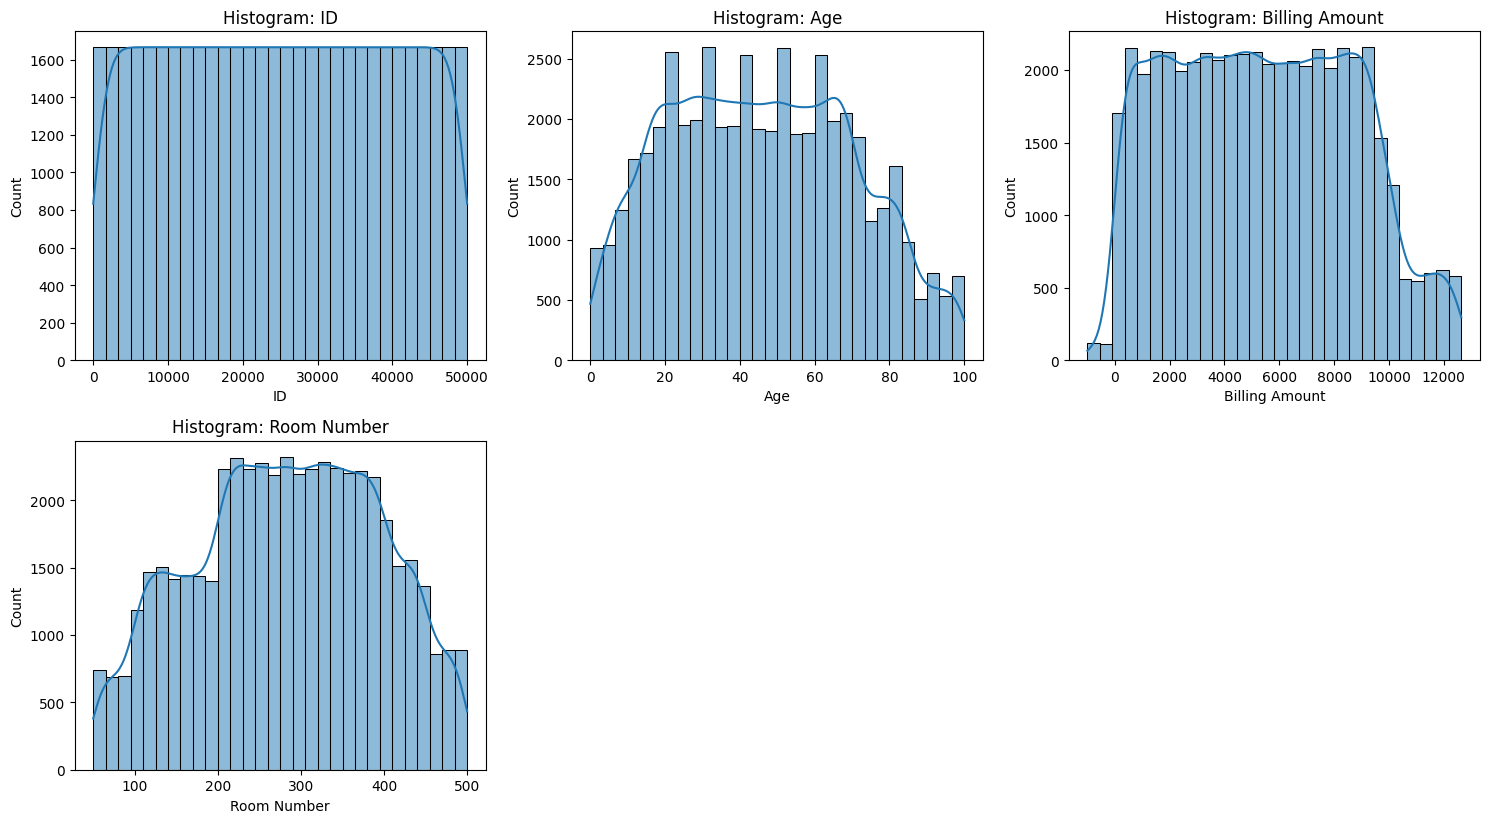

In [15]:
# 4. Distribution plots (Histograms) for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
plt.tight_layout()
plt.show()

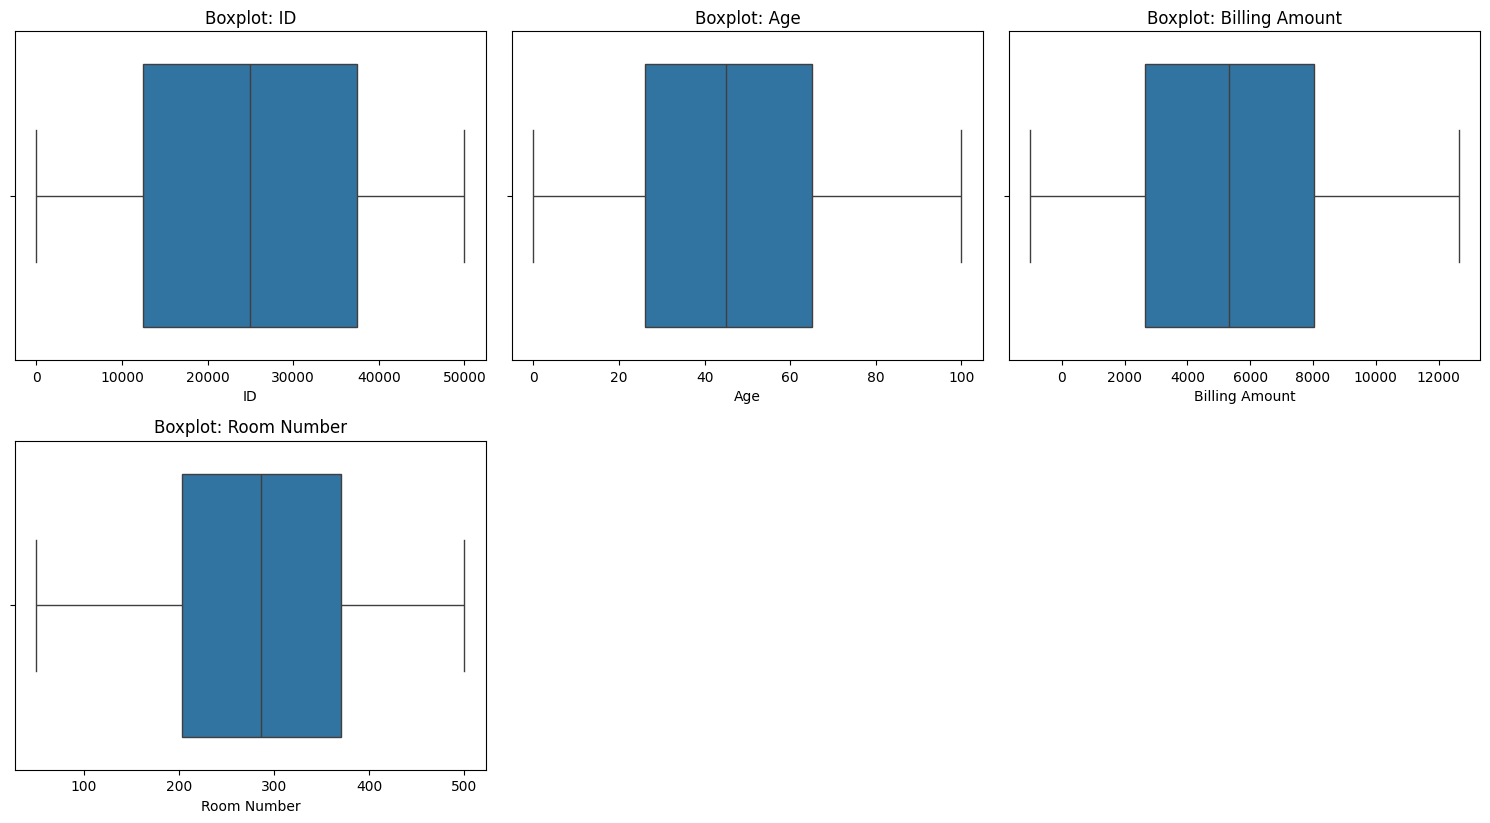

In [16]:
# 5. Boxplots for outlier detection
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

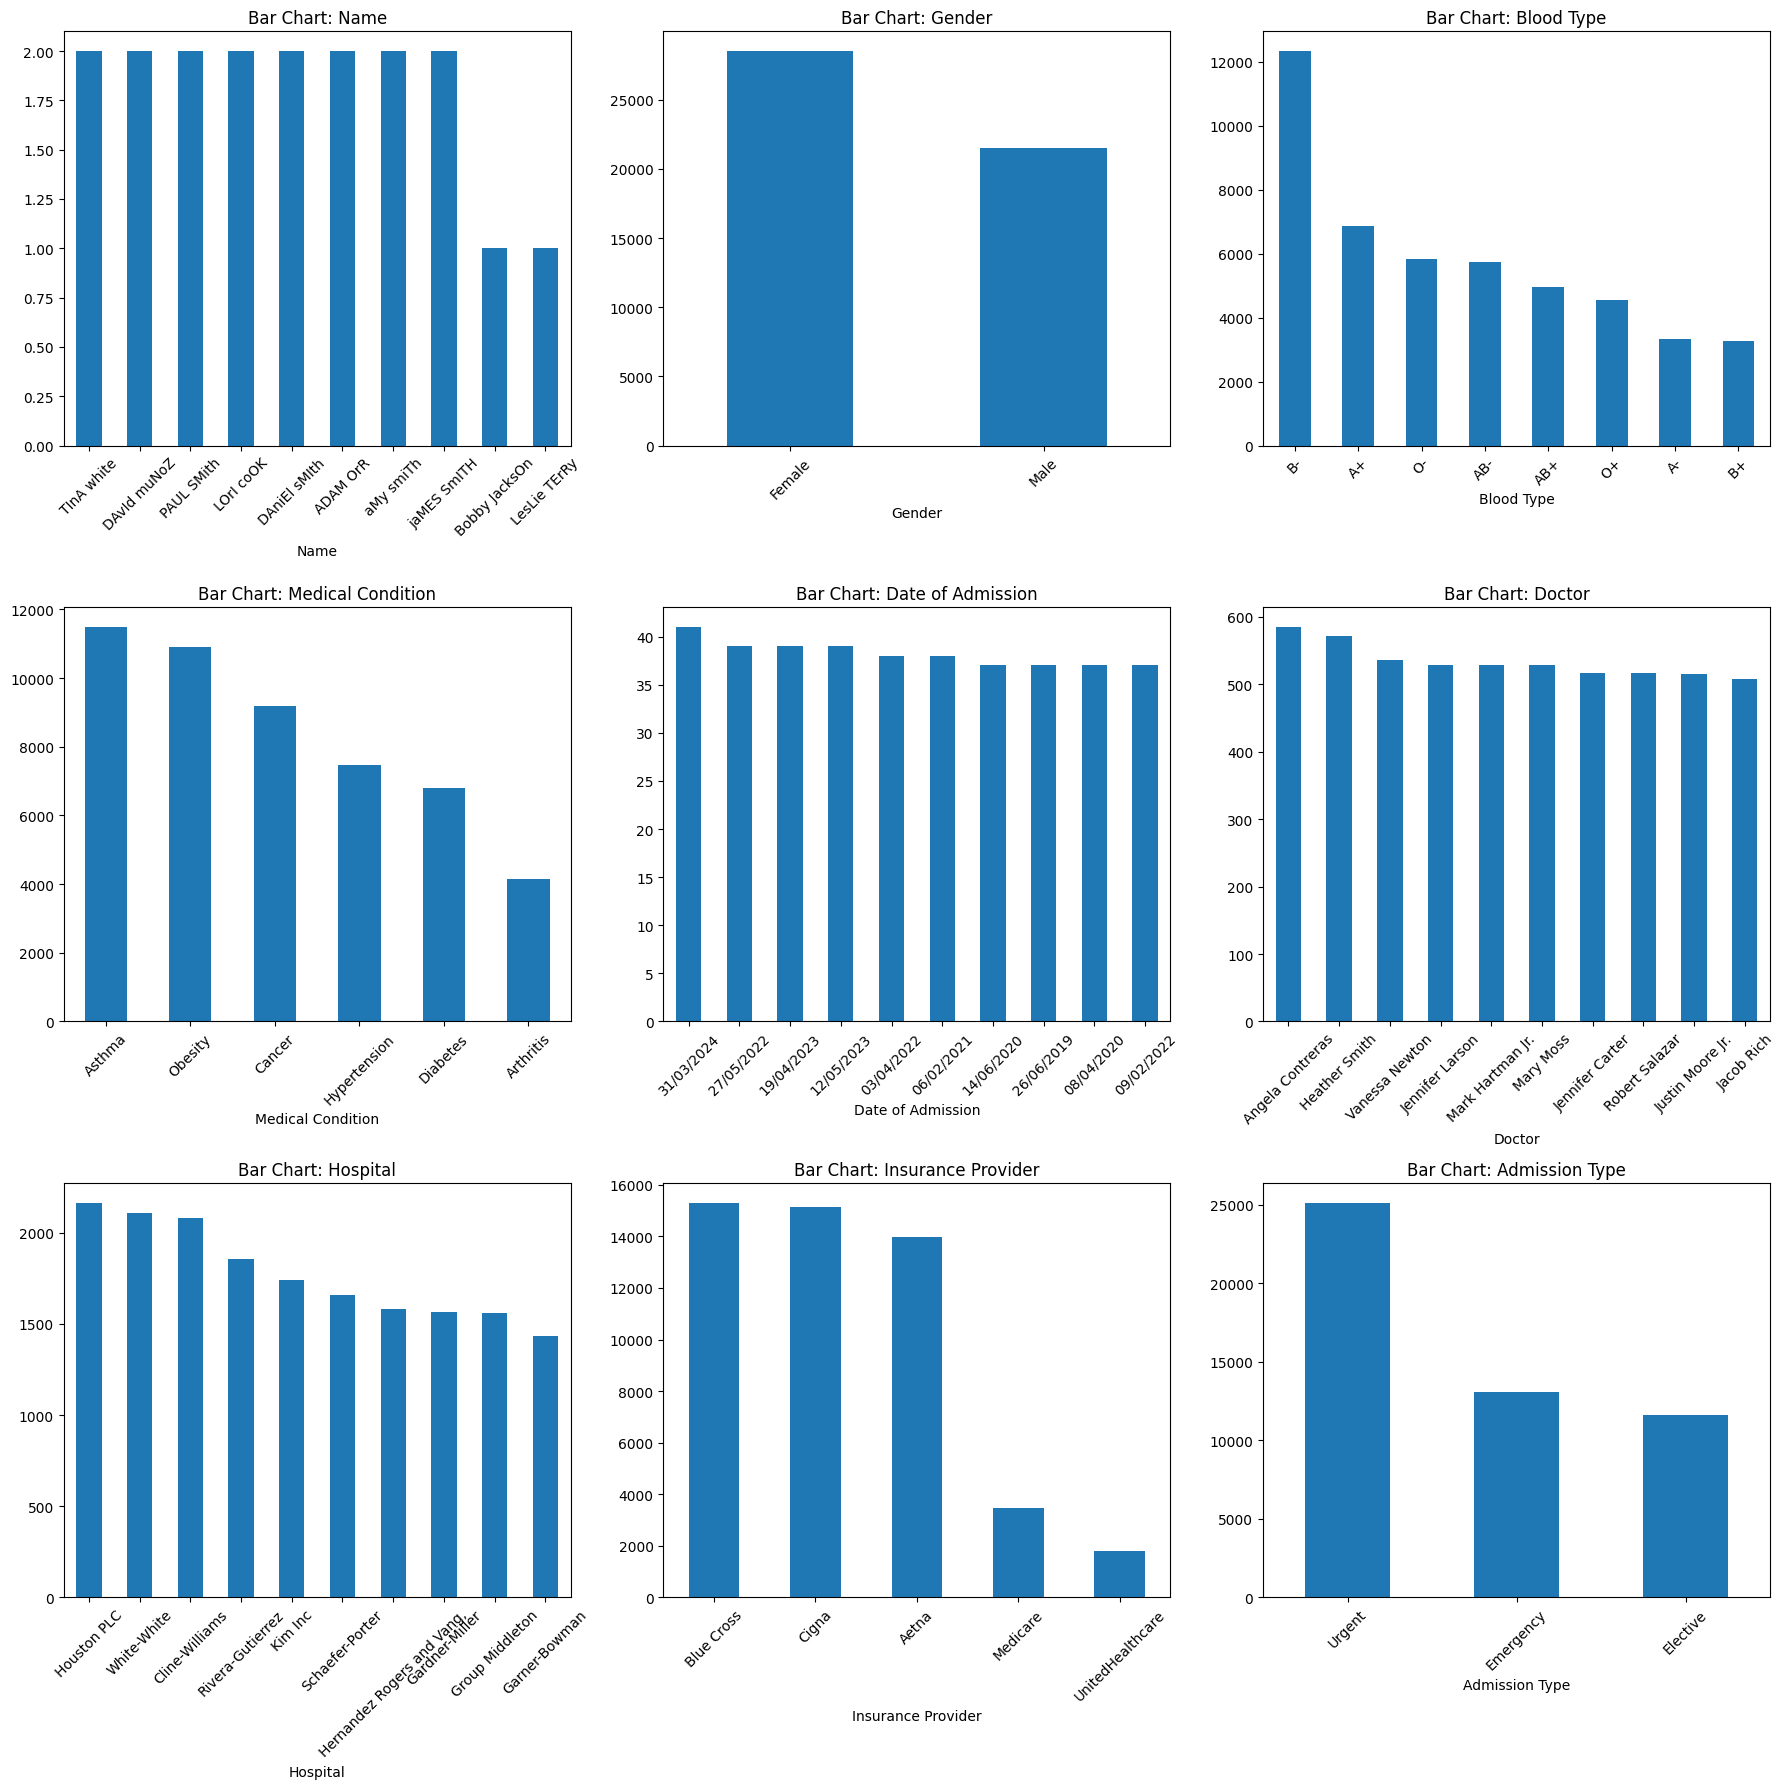

In [17]:
# 6. Bar charts for top categories
plt.figure(figsize=(18, 18))
for i, col in enumerate(categorical_cols[:9], 1):  # Limit to 9 for layout
    plt.subplot(3, 3, i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Chart: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preprocessing

In [18]:
display_missing_info(df)

                   Column Type  Missing Values  Percentage (%)
Blood Type              object            3065           6.130
Doctor                  object             804           1.608
Hospital                object             959           1.918
Insurance Provider      object             293           0.586
Billing Amount         float64             724           1.448
Admission Type          object             181           0.362


In [19]:
print(df.columns)

Index(['ID', 'Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [20]:
df = handle_categorical_missing_values(df) 
df = handle_numerical_missing_values(df)

Missing values before handling categorical columns:
                   Column Type  Missing Values  Percentage (%)
Blood Type              object            3065           6.130
Doctor                  object             804           1.608
Hospital                object             959           1.918
Insurance Provider      object             293           0.586
Billing Amount         float64             724           1.448
Admission Type          object             181           0.362

Missing values after handling categorical columns:
               Column Type  Missing Values  Percentage (%)
Billing Amount     float64             724           1.448
Missing values before handling numerical columns:
               Column Type  Missing Values  Percentage (%)
Billing Amount     float64             724           1.448

Missing values after handling numerical columns:
No missing values found!


c:\Users\VICTUS\Documents\ML-task 2\Healthcare-test-results-classification-using-ML\utils\preprocessing.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)  # For higher missing %
c:\Users\VICTUS\Documents\ML-task 2\Healthcare-test-results-classification-using-ML\utils\preprocessing.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never

In [21]:
display_missing_info(df)

No missing values found!


In [22]:
df.isnull().sum()

ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [23]:
# Step 2: Standardize text-based categorical fields
df['Name'] = df['Name'].str.title()
df['Gender'] = df['Gender'].str.capitalize()
df['Medical Condition'] = df['Medical Condition'].str.capitalize()
df['Doctor'] = df['Doctor'].str.title()
df['Hospital'] = df['Hospital'].str.title()
df['Insurance Provider'] = df['Insurance Provider'].str.title()
df['Medication'] = df['Medication'].str.capitalize()
df['Test Results'] = df['Test Results'].str.capitalize()
df['Admission Type'] = df['Admission Type'].str.capitalize()


In [24]:
# Step 3: Convert date columns to datetime
df["Date of Admission"] = pd.to_datetime(
    df["Date of Admission"], errors="coerce", dayfirst=True
)
df["Discharge Date"] = pd.to_datetime(
    df["Discharge Date"], errors="coerce", dayfirst=True
)

In [25]:
df.isnull().sum()

ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [26]:
# Calculate Length of Stay
df['Length of Stay in Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Reorder columns: insert 'Length of Stay' before 'Target'
target_index = df.columns.get_loc('Test Results')
cols = list(df.columns)
# Move 'Length of Stay' to the position before 'Target'
cols.insert(target_index, cols.pop(cols.index('Length of Stay in Days')))
df = df[cols]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      50000 non-null  int64         
 1   Name                    50000 non-null  object        
 2   Age                     50000 non-null  int64         
 3   Gender                  50000 non-null  object        
 4   Blood Type              50000 non-null  object        
 5   Medical Condition       50000 non-null  object        
 6   Date of Admission       50000 non-null  datetime64[ns]
 7   Doctor                  50000 non-null  object        
 8   Hospital                50000 non-null  object        
 9   Insurance Provider      50000 non-null  object        
 10  Billing Amount          50000 non-null  float64       
 11  Room Number             50000 non-null  int64         
 12  Admission Type          50000 non-null  object

In [28]:
# drop 'Discharge Date' and 'Date of Admission' columns
df.drop(columns=['Discharge Date', 'Date of Admission'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      50000 non-null  int64  
 1   Name                    50000 non-null  object 
 2   Age                     50000 non-null  int64  
 3   Gender                  50000 non-null  object 
 4   Blood Type              50000 non-null  object 
 5   Medical Condition       50000 non-null  object 
 6   Doctor                  50000 non-null  object 
 7   Hospital                50000 non-null  object 
 8   Insurance Provider      50000 non-null  object 
 9   Billing Amount          50000 non-null  float64
 10  Room Number             50000 non-null  int64  
 11  Admission Type          50000 non-null  object 
 12  Medication              50000 non-null  object 
 13  Length of Stay in Days  50000 non-null  int64  
 14  Test Results            50000 non-null

In [29]:
#Checking the percentage of the missing data
pd.set_option('display.max_rows', None)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns, 'Missing Percentage': missing_percentage})
print(missing_df)

                                       Feature  Missing Percentage
ID                                          ID                 0.0
Name                                      Name                 0.0
Age                                        Age                 0.0
Gender                                  Gender                 0.0
Blood Type                          Blood Type                 0.0
Medical Condition            Medical Condition                 0.0
Doctor                                  Doctor                 0.0
Hospital                              Hospital                 0.0
Insurance Provider          Insurance Provider                 0.0
Billing Amount                  Billing Amount                 0.0
Room Number                        Room Number                 0.0
Admission Type                  Admission Type                 0.0
Medication                          Medication                 0.0
Length of Stay in Days  Length of Stay in Days                

In [30]:
df.duplicated().sum()

np.int64(0)

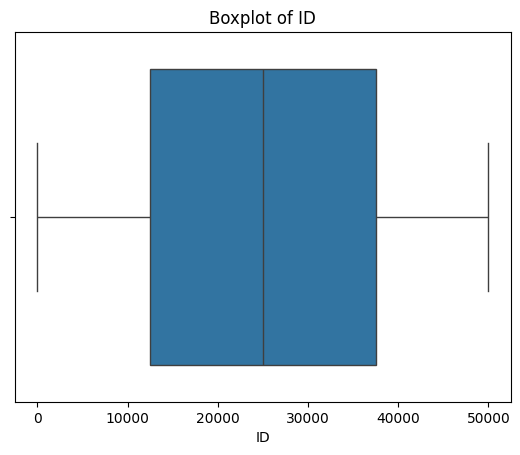

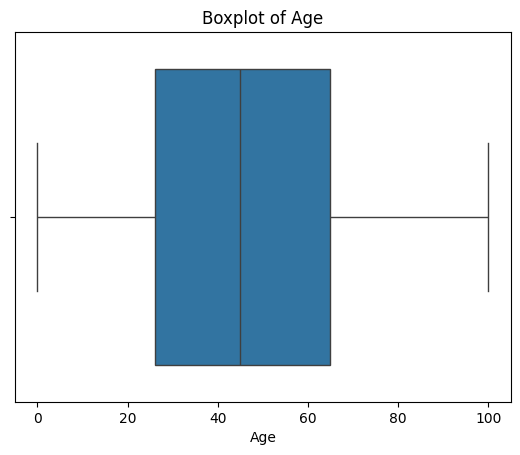

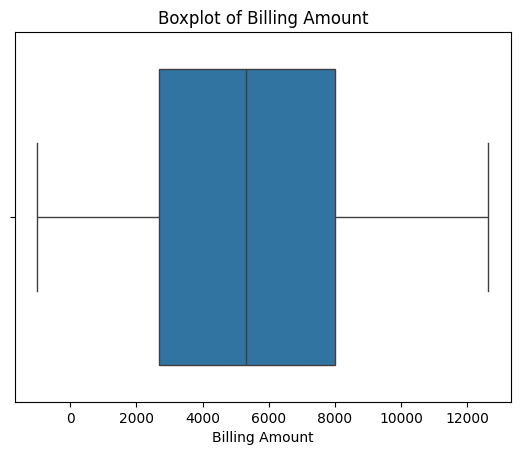

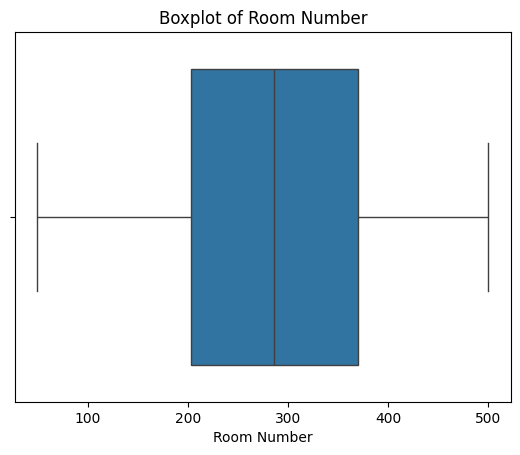

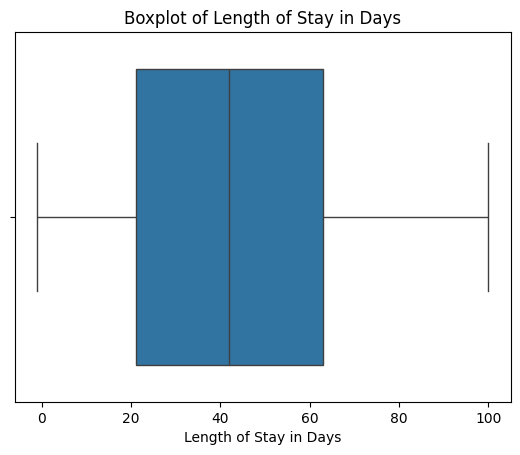

In [31]:
look_for_outliers(df)

In [32]:
# List of numerical features
numerical_features = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'Age']

# Apply the function to handle outliers
df = handle_outliers_iqr(df, numerical_features)

Feature: ID, Outliers Detected: 0
 - Lower Bound: -24998.50, Upper Bound: 74999.50

Feature: Billing Amount, Outliers Detected: 0
 - Lower Bound: -5252.95, Upper Bound: 15931.85

Feature: Room Number, Outliers Detected: 0
 - Lower Bound: -47.50, Upper Bound: 620.50

Feature: Length of Stay in Days, Outliers Detected: 0
 - Lower Bound: -42.00, Upper Bound: 126.00



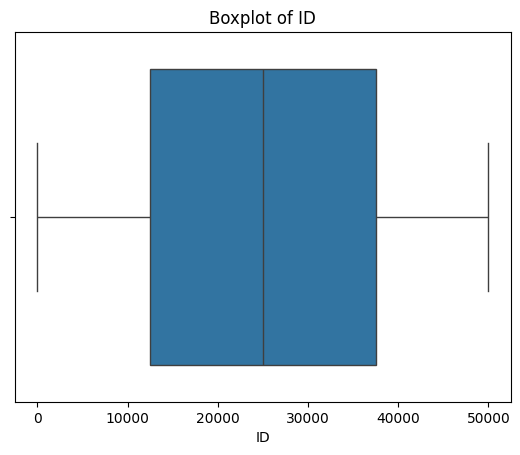

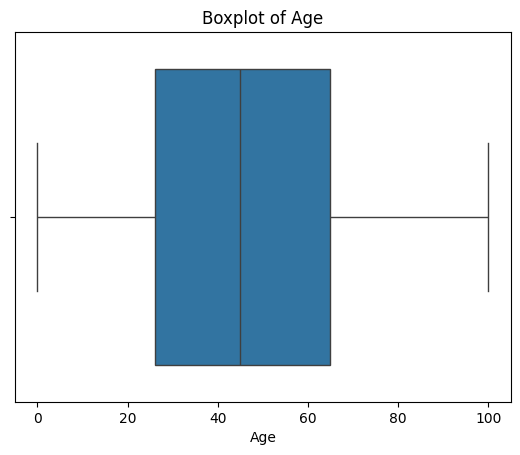

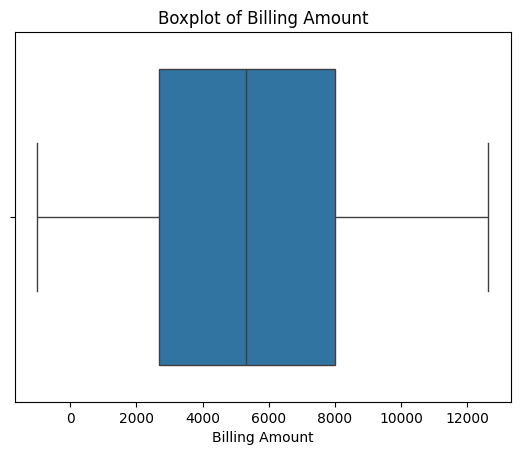

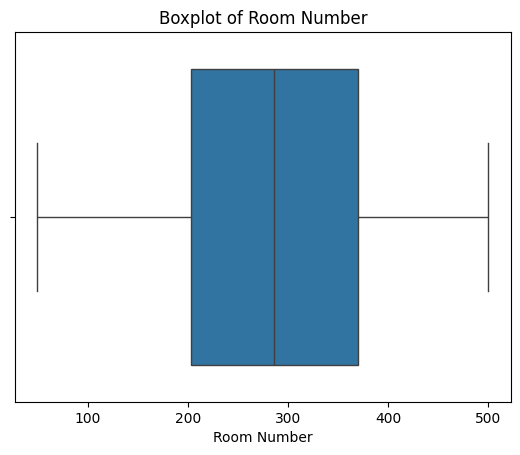

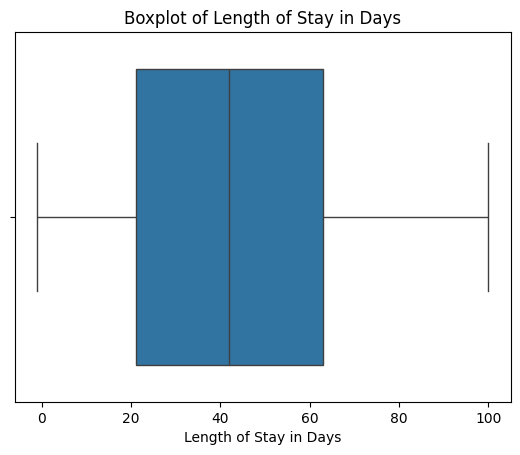

In [33]:
look_for_outliers(df)

In [34]:
# Drop ID and Name
df.drop(columns=['ID', 'Name', 'Room Number'], inplace=True)

In [35]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes =pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                                       Feature Data Type
Age                                        Age     int64
Gender                                  Gender    object
Blood Type                          Blood Type    object
Medical Condition            Medical Condition    object
Doctor                                  Doctor    object
Hospital                              Hospital    object
Insurance Provider          Insurance Provider    object
Billing Amount                  Billing Amount   float64
Admission Type                  Admission Type    object
Medication                          Medication    object
Length of Stay in Days  Length of Stay in Days   float64
Test Results                      Test Results    object


In [36]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != ['Test Results', 'Age']]

df, skewed_features, transformation_details = treat_skewness(df, numerical_features)

Found 0 skewed continuous features: []


In [37]:
df, scaled_cols = scale_features(df, target_col='Test Results', scaler_type='standard')

[INFO] Numerical columns: ['Age', 'Billing Amount', 'Length of Stay in Days']
[INFO] Continuous columns selected for scaling: ['Age', 'Billing Amount', 'Length of Stay in Days']
[INFO] Using StandardScaler
[SUCCESS] Scaled features: ['Age', 'Billing Amount', 'Length of Stay in Days']


In [38]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Length of Stay in Days,Test Results
0,-0.772600,Female,O-,Asthma,Mark Hartman Jr.,Sons And Miller,Cigna,-0.861078,Elective,Ibuprofen,1.173876,Normal
1,0.906636,Female,O-,Cancer,Angela Contreras,White-White,Cigna,-1.219978,Elective,Ibuprofen,-1.611121,Inconclusive
2,-1.018342,Female,A+,Hypertension,David Ruiz,Group Middleton,Medicare,-0.082254,Emergency,Paracetamol,1.135196,Normal
3,1.848646,Male,AB-,Diabetes,Jenny Griffith,Morris-Arellano,Blue Cross,1.111797,Urgent,Ibuprofen,-0.876191,Abnormal
4,0.251324,Female,A+,Diabetes,Cynthia Scott,Williams-Davis,Blue Cross,-1.050836,Emergency,Penicillin,-0.025220,Abnormal


In [39]:
X_encoded, y_encoded = encode_features(df, target_col="Test Results")
df = pd.concat([X_encoded, y_encoded.rename("Test Results")], axis=1)

Ordinal encoding applied to 'Admission Type' with mapping {'Elective': 0, 'Urgent': 1, 'Emergency': 2}
Binary replacement applied where possible using map: {'Male': 0, 'Female': 1, 'Yes': 1, 'No': 0, 'True': 1, 'False': 0}
Target column 'Test Results' label encoded.
Target column 'Test Results' separated from features.
'Blood Type' has 9 unique values
One-hot encoding applied to 'Blood Type' (<= 10 unique values)
'Medical Condition' has 6 unique values
One-hot encoding applied to 'Medical Condition' (<= 10 unique values)
'Doctor' has 217 unique values
Target encoding applied to 'Doctor' (> 10 unique values)
'Hospital' has 60 unique values


c:\Users\VICTUS\Documents\ML-task 2\Healthcare-test-results-classification-using-ML\utils\encoding.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace(binary_map)


Target encoding applied to 'Hospital' (> 10 unique values)
'Insurance Provider' has 5 unique values
One-hot encoding applied to 'Insurance Provider' (<= 10 unique values)
'Medication' has 5 unique values
One-hot encoding applied to 'Medication' (<= 10 unique values)
Boolean column 'Blood Type_A+' converted to integers (0/1)
Boolean column 'Blood Type_A-' converted to integers (0/1)
Boolean column 'Blood Type_AB+' converted to integers (0/1)
Boolean column 'Blood Type_AB-' converted to integers (0/1)
Boolean column 'Blood Type_B+' converted to integers (0/1)
Boolean column 'Blood Type_B-' converted to integers (0/1)
Boolean column 'Blood Type_O+' converted to integers (0/1)
Boolean column 'Blood Type_O-' converted to integers (0/1)
Boolean column 'Blood Type_Unknown' converted to integers (0/1)
Boolean column 'Medical Condition_Arthritis' converted to integers (0/1)
Boolean column 'Medical Condition_Asthma' converted to integers (0/1)
Boolean column 'Medical Condition_Cancer' converted 

In [40]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                                                                 Feature  \
Age                                                                  Age   
Gender                                                            Gender   
Doctor                                                            Doctor   
Hospital                                                        Hospital   
Billing Amount                                            Billing Amount   
Admission Type                                            Admission Type   
Length of Stay in Days                            Length of Stay in Days   
Blood Type_A+                                              Blood Type_A+   
Blood Type_A-                                              Blood Type_A-   
Blood Type_AB+                                            Blood Type_AB+   
Blood Type_AB-                                            Blood Type_AB-   
Blood Type_B+                                              Blood Type_B+   
Blood Type_B

In [41]:
numeric_desc = df.describe()
print("Descriptive Statistics (Numeric Columns):")
print(numeric_desc)

Descriptive Statistics (Numeric Columns):
                Age        Gender        Doctor      Hospital  Billing Amount  \
count  5.000000e+04  50000.000000  50000.000000  50000.000000    5.000000e+04   
mean  -5.925926e-17      0.570280      0.996835      0.997725    1.136868e-17   
std    1.000010e+00      0.495041      0.286517      0.250610    1.000010e+00   
min   -1.878438e+00      0.000000      0.328254      0.420259   -1.986708e+00   
25%   -8.135567e-01      0.000000      0.780220      0.829937   -8.407582e-01   
50%   -3.537453e-02      1.000000      0.974052      0.972205   -2.567380e-02   
75%    7.837647e-01      1.000000      1.184332      1.120562    8.055389e-01   
max    2.217258e+00      1.000000      1.940113      1.974192    2.250413e+00   

       Admission Type  Length of Stay in Days  Blood Type_A+  Blood Type_A-  \
count    50000.000000            5.000000e+04   50000.000000   50000.000000   
mean         1.029880           -5.911716e-17       0.137460       0.0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  50000 non-null  float64
 1   Gender                               50000 non-null  int64  
 2   Doctor                               50000 non-null  float64
 3   Hospital                             50000 non-null  float64
 4   Billing Amount                       50000 non-null  float64
 5   Admission Type                       50000 non-null  int64  
 6   Length of Stay in Days               50000 non-null  float64
 7   Blood Type_A+                        50000 non-null  int64  
 8   Blood Type_A-                        50000 non-null  int64  
 9   Blood Type_AB+                       50000 non-null  int64  
 10  Blood Type_AB-                       50000 non-null  int64  
 11  Blood Type_B+               

In [43]:
print(df.columns.tolist())

['Age', 'Gender', 'Doctor', 'Hospital', 'Billing Amount', 'Admission Type', 'Length of Stay in Days', 'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Blood Type_Unknown', 'Medical Condition_Arthritis', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Insurance Provider_Aetna', 'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna', 'Insurance Provider_Medicare', 'Insurance Provider_Unitedhealthcare', 'Medication_Aspirin', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin', 'Test Results']


Statistical Analysis after cleaning

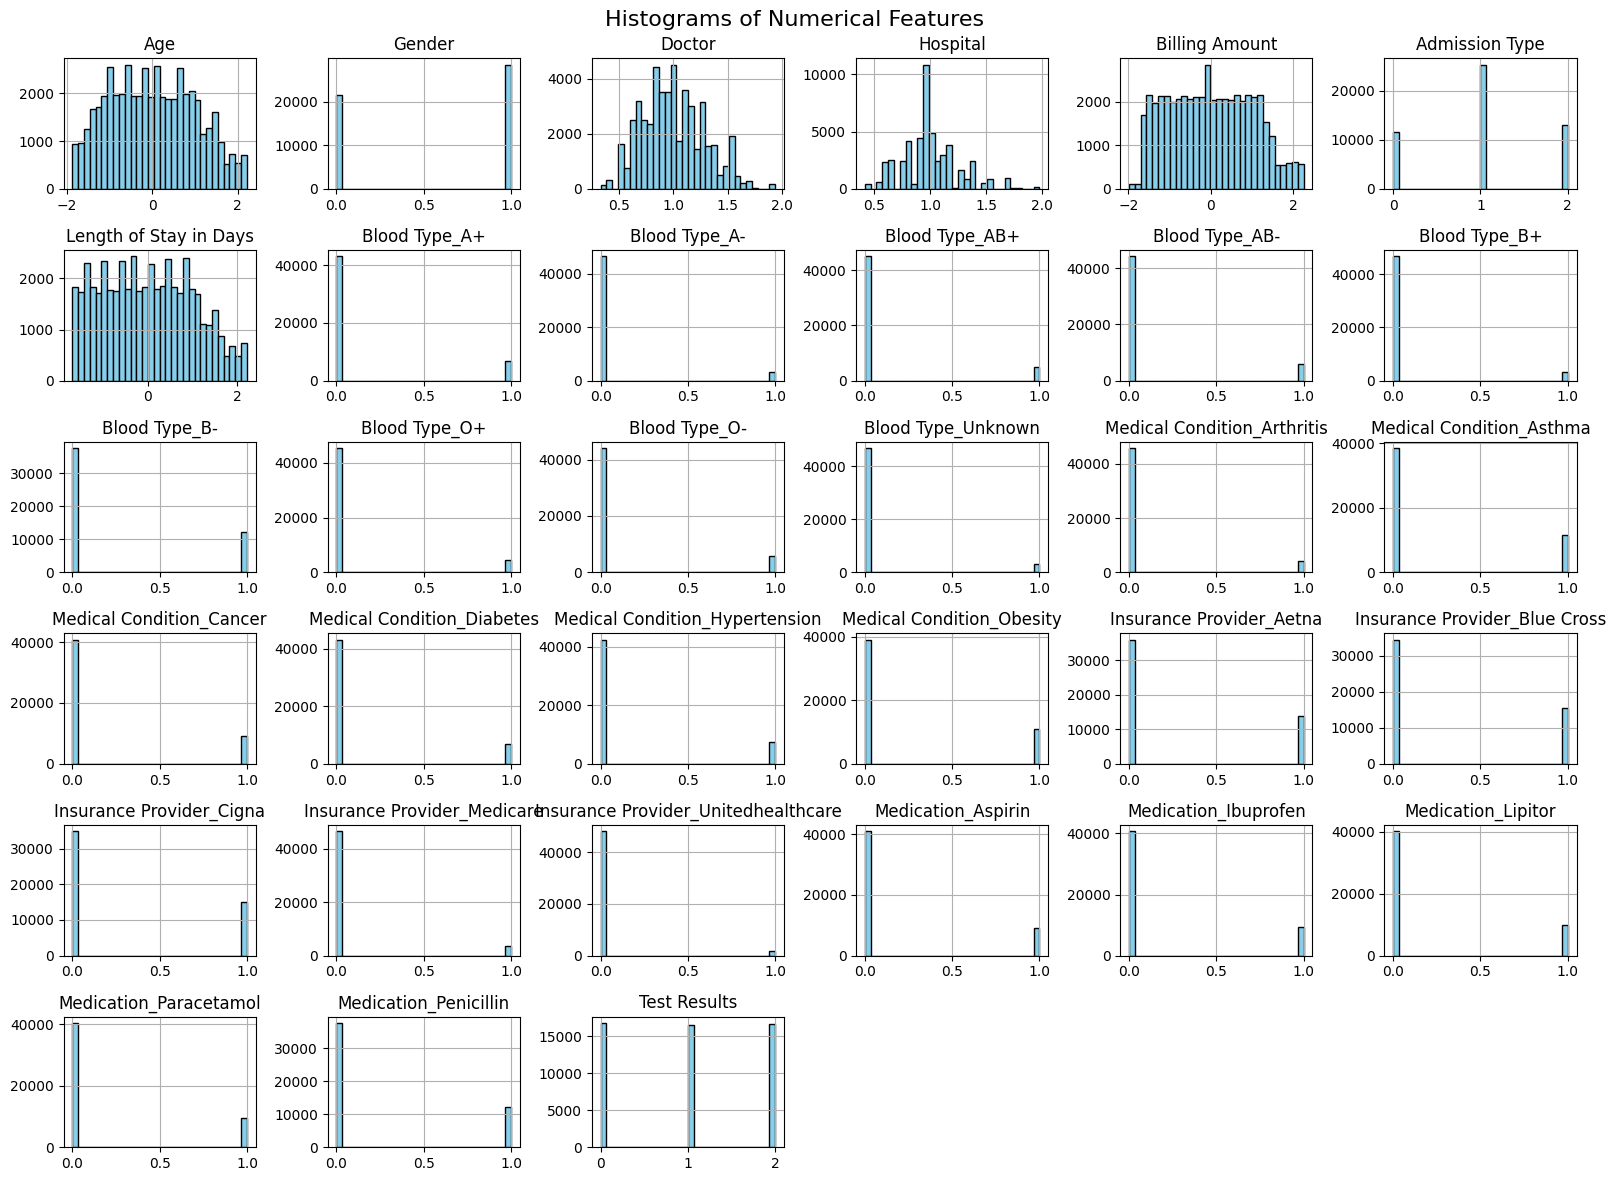

In [44]:
# Histograms for numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


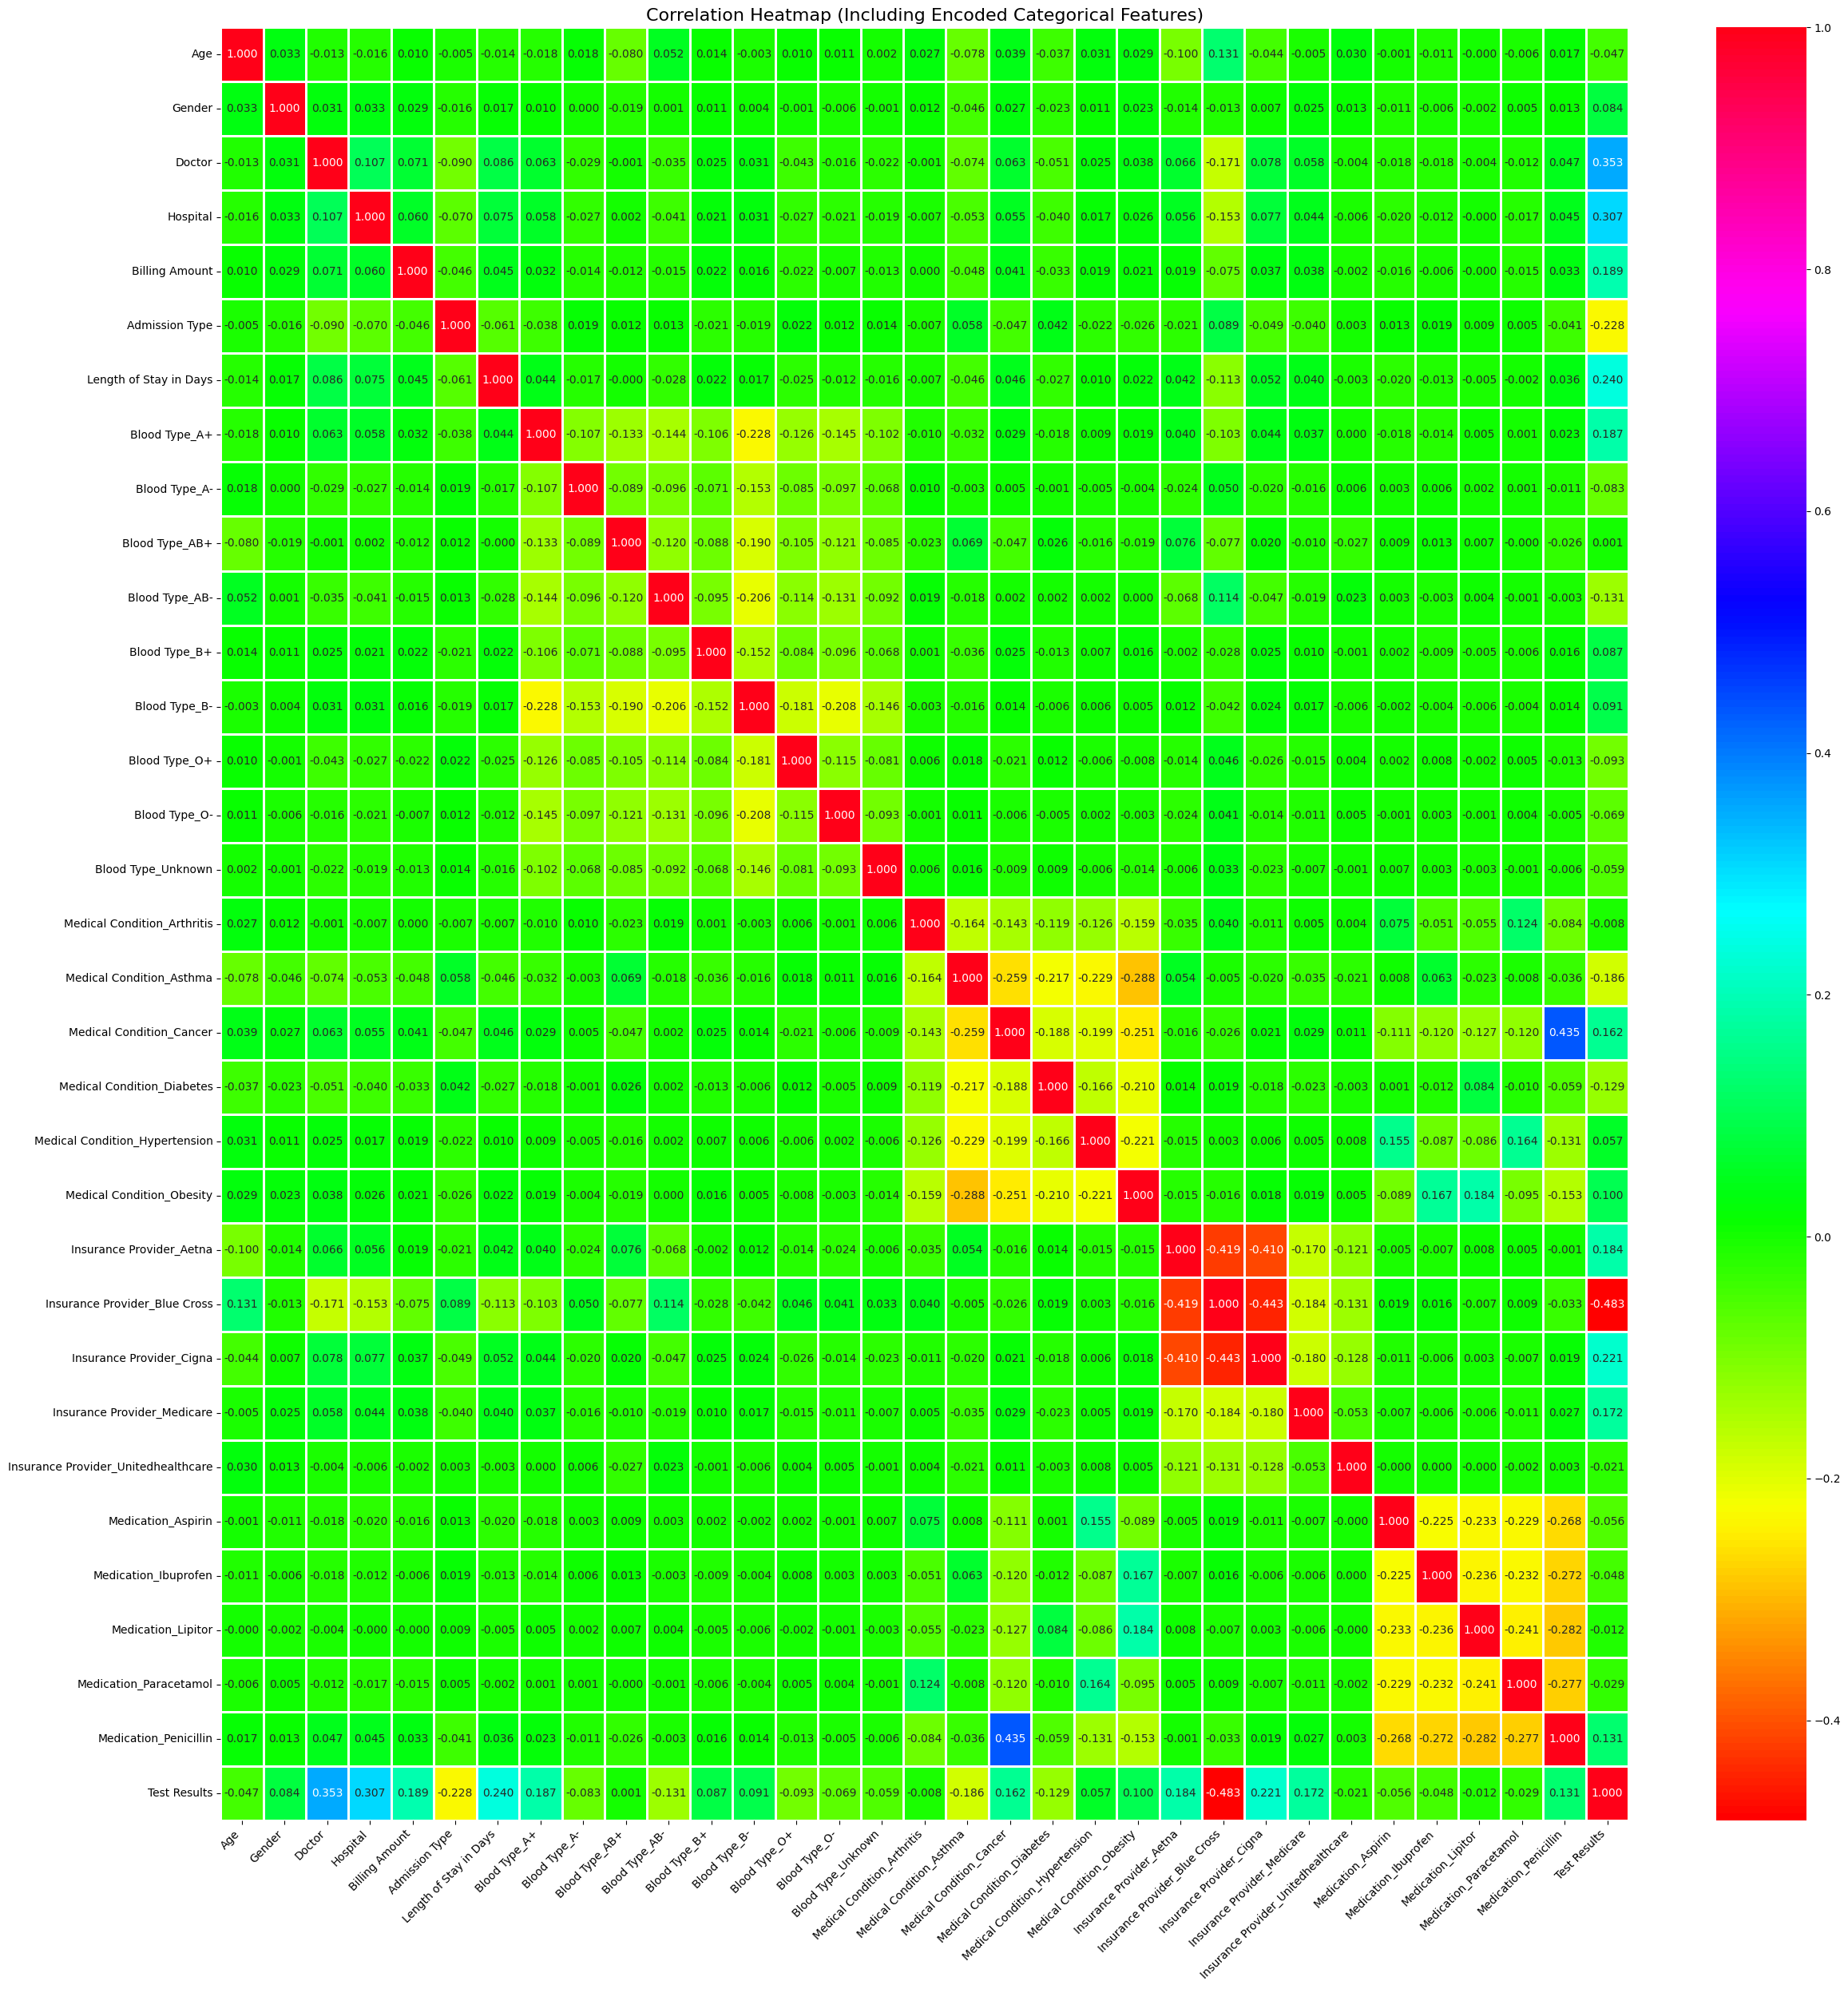

In [45]:
# Confusion Heat Map
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='hsv', 
            fmt='.3f', 
            linewidths=2)

plt.title('Correlation Heatmap (Including Encoded Categorical Features)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [46]:
# | Absolute Correlation Value | Strength                          |
# | -------------------------- | --------------------------------- |
# | 0.0 - 0.1                  | Negligible                        |
# | 0.1 - 0.3                  | Weak                              |
# | 0.3 - 0.5                  | Moderate                          |
# | 0.5 - 0.7                  | Strong                            |
# | 0.7 - 0.9                  | Very Strong                       |
# | 0.9 - 1.0                  | Extremely High / Likely Redundant |


def get_correlation_table(df):
    # Compute correlation matrix
    target='Test Results'
    correlation_matrix = df.corr()

    # Extract only correlations with the target, excluding the target itself
    target_corr = correlation_matrix[target].drop(labels=[target])

    # Convert to a clean DataFrame
    corr_table = pd.DataFrame({
        'Feature': target_corr.index,
        'Correlation with ' + target: target_corr.values
    }).sort_values(by='Correlation with ' + target, ascending=False).reset_index(drop=True)

    return corr_table


get_correlation_table(df)

,Feature,Correlation with Test Results
0,Doctor,0.353049
1,Hospital,0.306955
2,Length of Stay in Days,0.240421
3,Insurance Provider_Cigna,0.220564
4,Billing Amount,0.189326
5,Blood Type_A+,0.187110
6,Insurance Provider_Aetna,0.183683
7,Insurance Provider_Medicare,0.172020
8,Medical Condition_Cancer,0.162278
9,Medication_Penicillin,0.131097


<Figure size 2500x800 with 0 Axes>

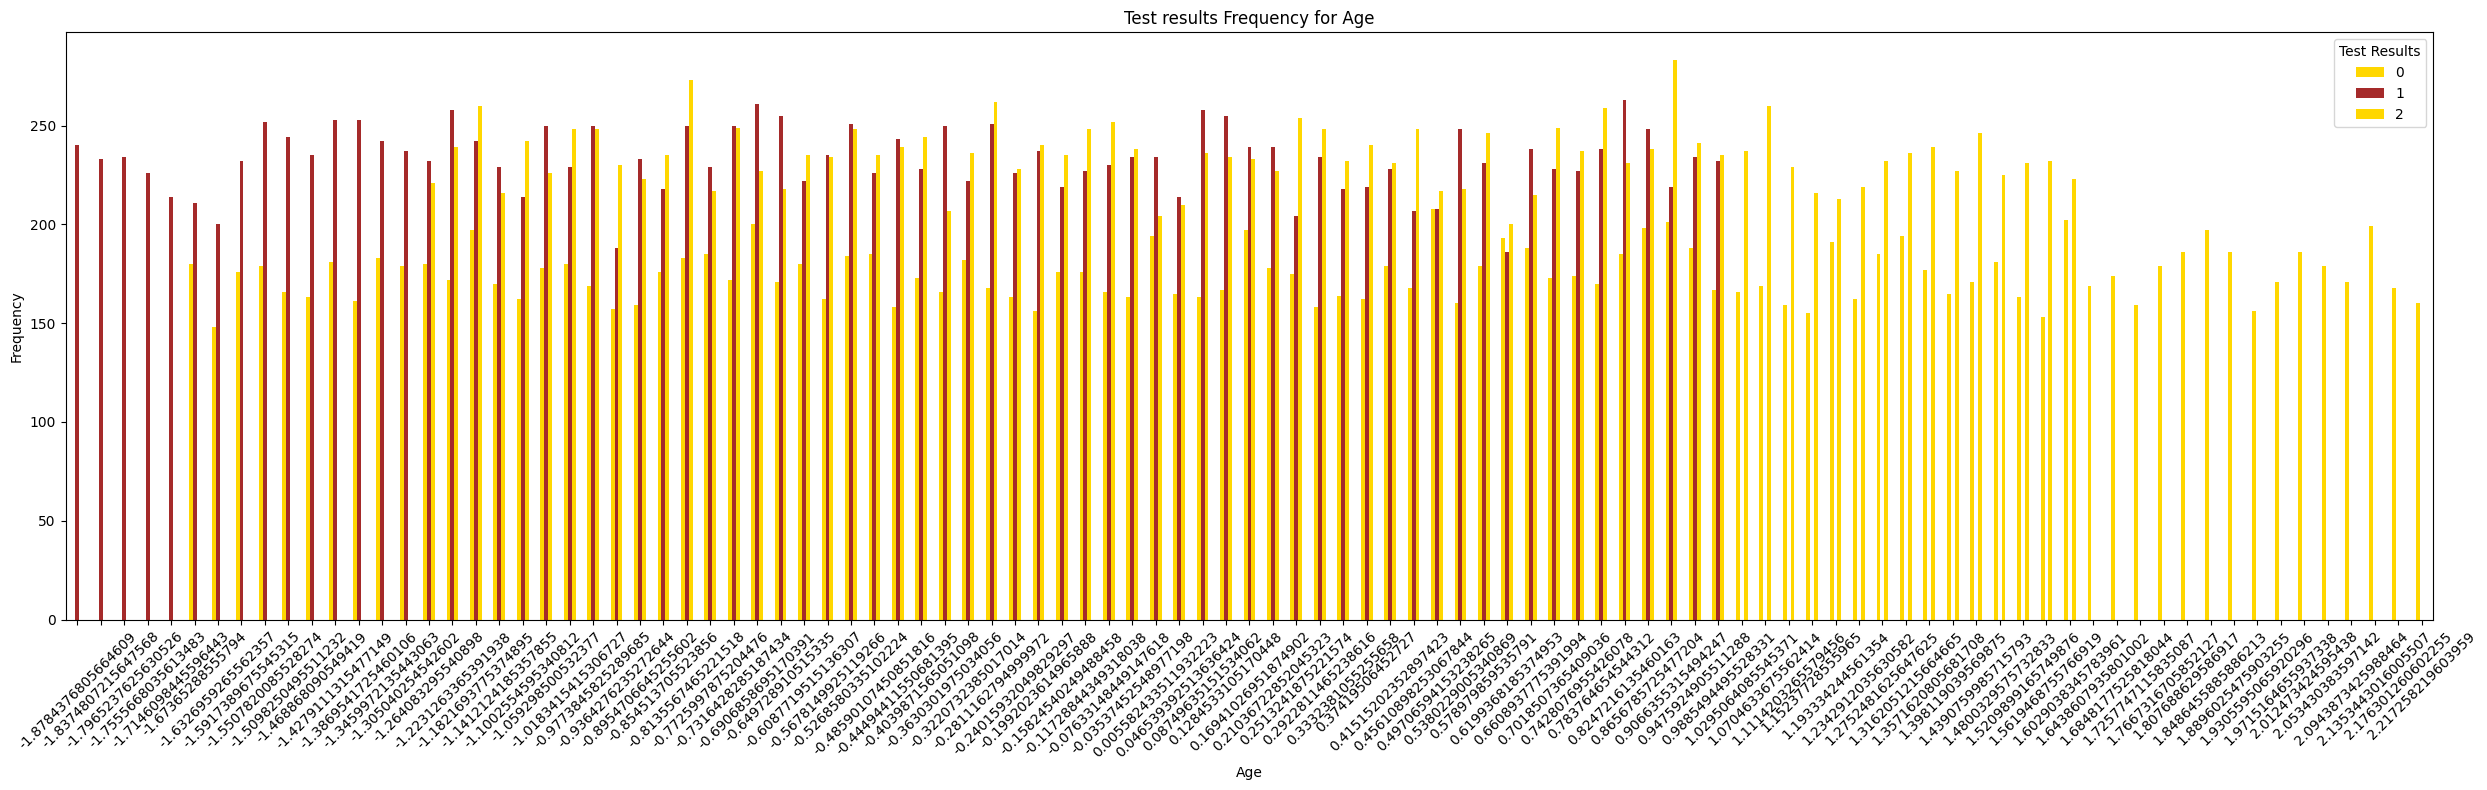

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with actual column names from your dataset
feature_col = 'Age'      # Any categorical or discrete numeric feature
target_col = 'Test Results'    # Your class label column

# Check the columns exist
assert feature_col in df.columns and target_col in df.columns, "Check your column names"

# Create the crosstab and plot
plt.figure(figsize=(25, 8))
pd.crosstab(df[feature_col], df[target_col]).plot(kind='bar',
                                                figsize=(25, 8), 
                                                color=['gold', 'brown'])
plt.title(f'{target_col.capitalize()} Frequency for {feature_col.capitalize()}')
plt.xlabel(feature_col.capitalize())
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# creates a grid of plots that shows pairwise relationships between all numeric columns in df.
sns.pairplot(data=df)

In [49]:
# save dataframe to csv
df.to_csv("data/processed_data.csv", index=False)
print("[INFO] Preprocessed dataset saved as 'preprocessed_data.csv'")

[INFO] Preprocessed dataset saved as 'preprocessed_data.csv'


PCA

In [50]:
from utils.PCA import apply_pca
from utils.scaling import scale_features
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
from sklearn.decomposition import PCA

[INFO] Numeric columns: ['Age', 'Gender', 'Doctor', 'Hospital', 'Billing Amount', 'Admission Type', 'Length of Stay in Days', 'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Blood Type_Unknown', 'Medical Condition_Arthritis', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Insurance Provider_Aetna', 'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna', 'Insurance Provider_Medicare', 'Insurance Provider_Unitedhealthcare', 'Medication_Aspirin', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin', 'Test Results']
[INFO] Numerical columns: ['Age', 'Gender', 'Doctor', 'Hospital', 'Billing Amount', 'Admission Type', 'Length of Stay in Days', 'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood T

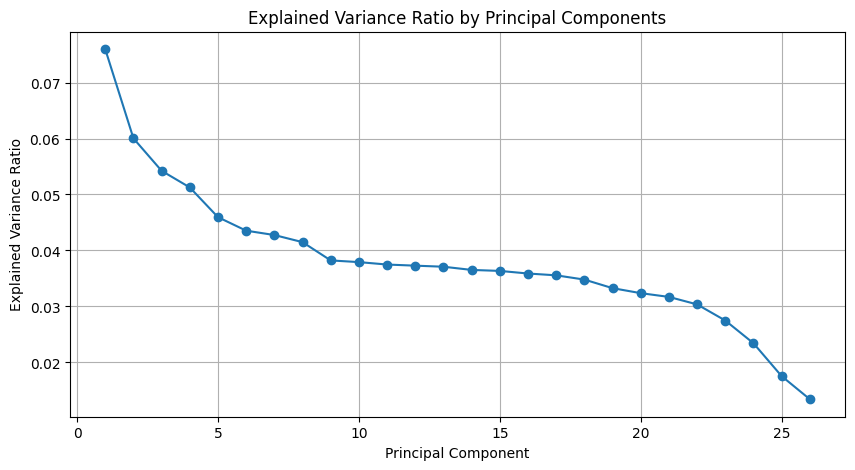

Features after variance threshold: 31
Selected components: 26
Top components:
PC1: 7.6%
PC2: 6.0%
PC3: 5.4%
PC4: 5.1%
PC5: 4.6%


In [51]:
df = pd.read_csv("data/processed_data.csv")

#Select numeric colums
numeric_cols = df.select_dtypes(include=['number']).columns
print("[INFO] Numeric columns:", list(numeric_cols))

#Scale numeric features
X_scaled, _ = scale_features(df[numeric_cols], scaler_type='standard')

#Feature selection - remove low variance features
selector = VarianceThreshold(threshold=0.1)
X_highvar = selector.fit_transform(X_scaled)

#Apply PCA
X_pca, pca = apply_pca(X_highvar, variance_threshold=0.99)

#Output
print(f"Features after variance threshold: {X_highvar.shape[1]}")
print(f"Selected components: {X_pca.shape[1]}")
print("Top components:")
for i, ratio in enumerate(pca.explained_variance_ratio_[:5]):
    print(f"PC{i+1}: {ratio:.1%}")

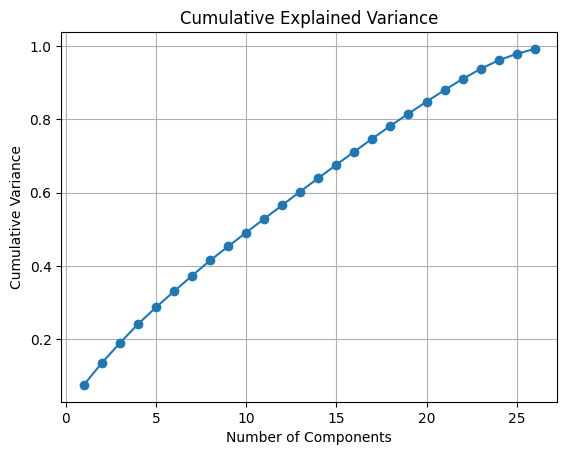

In [52]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.show()

In [53]:
# Define PCA column names
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_data = pd.DataFrame(X_pca, columns=pca_columns)

# Read labels and reset index
y = pd.read_csv("data/processed_data.csv")['Test Results'].reset_index(drop=True)

# Combine PCA features and labels
df_pca = pd.concat([pca_data, y], axis=1)

# Save to CSV
df_pca.to_csv('data/PCA_data.csv', index=False)
print("[INFO] PCA-transformed dataset saved as 'PCA_data.csv' with Target 'Test Results' ")

[INFO] PCA-transformed dataset saved as 'PCA_data.csv' with Target 'Test Results' 


Training Models Without PCA

In [54]:
# read preprocessed data
df_cleaned = pd.read_csv("data/processed_data.csv")

x = df_cleaned.drop(columns=['Test Results'])
y = df_cleaned['Test Results']

Random Forest

In [55]:
# RANDOM FOREST MODEL

# split data intro train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# test data in random forest model
rf_model = random_forest_with_tuning(X_train, X_val, X_test, y_train, y_val, y_test)

Training set size: 35000
Validation set size: 7500
Test set size: 7500
Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\VICTUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\VICTUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\VICTUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



[INFO] Best Parameters Found:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

[INFO] Random Forest Evaluation
Train Accuracy: 95.53%
Validation Accuracy: 95.61%
Test Accuracy: 86.57%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2513
           1       0.81      0.85      0.83      2440
           2       0.91      0.90      0.90      2547

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500



Training Models With PCA

In [56]:
# Read PCA data (features)
pca_data = pd.read_csv('data/PCA_data.csv')

# Print for sanity check
print(df_pca.columns)
print(df_pca.head())
print(df_pca.shape)

# Separate features and target
x = df_pca.drop(columns=['Test Results'])
y = df_pca['Test Results']

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'Test Results'],
      dtype='object')
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.698365 -1.055476 -0.614997  0.703470  2.836640  1.256823 -0.934628   
1  0.282135  0.971783 -1.020891 -0.560268  1.931669  0.781633 -0.802308   
2  1.711451 -1.115257  2.569454 -1.160401 -1.306682  0.698062 -1.695420   
3 -2.799373  0.743318 -1.322860 -0.860972 -0.421045  0.082203 -0.225177   
4 -1.121801  1.746528 -0.550656  0.232327 -0.536907 -1.686965 -0.610869   

        PC8       PC9      PC10  ...      PC18      PC19      PC20      PC21  \
0 -0.064784  1.863757  1.215487  ...  0.498812 -1.013493 -1.010373  1.052351   
1  0.021299  1.380318  2.251233  ... -0.283159  0.471145 -0.762668 -1.311968   
2 -0.844856 -0.012602 -0.995481  ...  0.464134  0.

Random Forest

In [57]:
# Split into training and temp (for val + test) (training 70%, temp 30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp into validation and test sets (validation 15%, test 15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


# Print sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train your random forest with correct data
rf_model = random_forest_with_tuning(X_train, X_val, X_test, y_train, y_val, y_test)

Training set size: 35000
Validation set size: 7500
Test set size: 7500
Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\VICTUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



[INFO] Best Parameters Found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

[INFO] Random Forest Evaluation
Train Accuracy: 100.00%
Validation Accuracy: 100.00%
Test Accuracy: 99.91%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2516
           1       1.00      1.00      1.00      2482
           2       1.00      1.00      1.00      2502

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



C:\Users\VICTUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\VICTUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
